In [2]:
import os
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
img_width=256; img_height=256
batch_size=16


In [8]:
TRAINING_DIR = 'C:/Users/dokkuakash/Downloads/dataset'


train_datagen = ImageDataGenerator(rescale = 1/255.0)


NameError: name 'ImageDataGenerator' is not defined

In [9]:
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width)
                                                    )

NameError: name 'train_datagen' is not defined

In [10]:
VALIDATION_DIR = 'C:/Users/dokkuakash/Downloads/dataset'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)


NameError: name 'ImageDataGenerator' is not defined

In [148]:
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 1292 images belonging to 5 classes.


In [149]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
best_model_file = 'C:/Users/APPLE/Desktop/vgg16_bestweights_256.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)


In [150]:
model = tf.keras.models.Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])

In [151]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 58, 58, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 29, 29, 64)       

In [152]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics =['accuracy'])

In [153]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model, callbacks]
                              )


Epoch 1/10
93/94 [============================>.] - ETA: 1s - loss: 1.3085 - acc: 0.3841
Epoch 00001: val_acc improved from -inf to 0.41563, saving model to C:/Users/APPLE/Desktop/vgg16_bestweights_256.h5
94/94 [==============================] - 212s 2s/step - loss: 1.3078 - acc: 0.3833 - val_loss: 1.3017 - val_acc: 0.4156
Epoch 2/10
93/94 [============================>.] - ETA: 1s - loss: 1.2087 - acc: 0.4367
Epoch 00002: val_acc did not improve from 0.41563
94/94 [==============================] - 228s 2s/step - loss: 1.2073 - acc: 0.4373 - val_loss: 1.3488 - val_acc: 0.4133
Epoch 3/10
93/94 [============================>.] - ETA: 1s - loss: 1.1389 - acc: 0.4993
Epoch 00003: val_acc improved from 0.41563 to 0.53870, saving model to C:/Users/APPLE/Desktop/vgg16_bestweights_256.h5
94/94 [==============================] - 214s 2s/step - loss: 1.1378 - acc: 0.4993 - val_loss: 1.0056 - val_acc: 0.5387
Epoch 4/10
93/94 [============================>.] - ETA: 1s - loss: 1.0450 - acc: 0.5377

In [154]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))

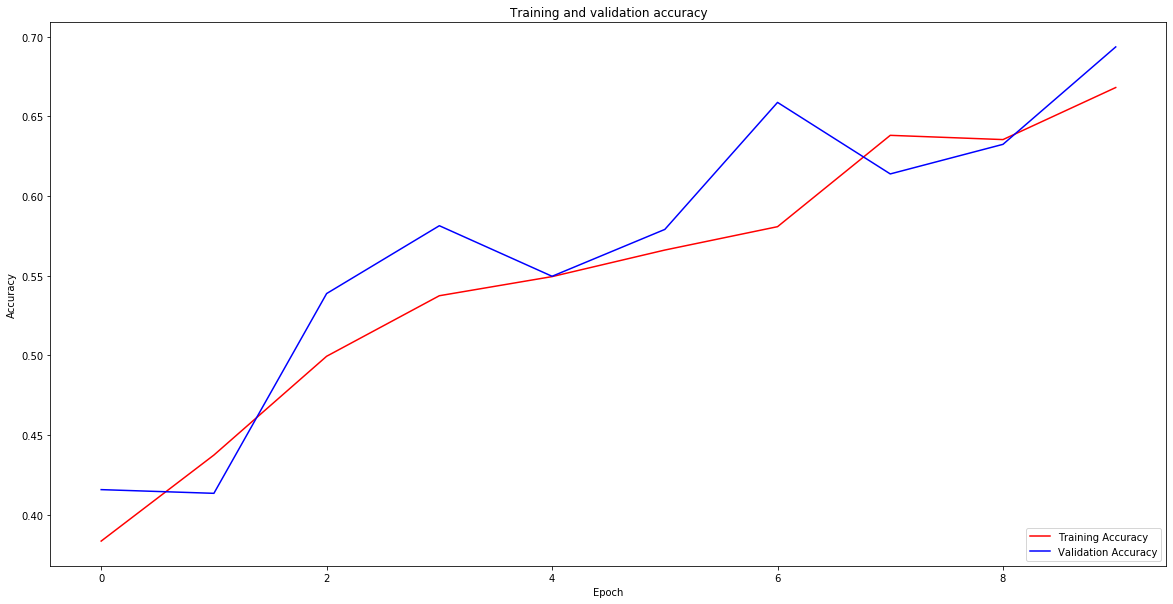

In [155]:
fig = plt.figure(figsize=(20,10))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

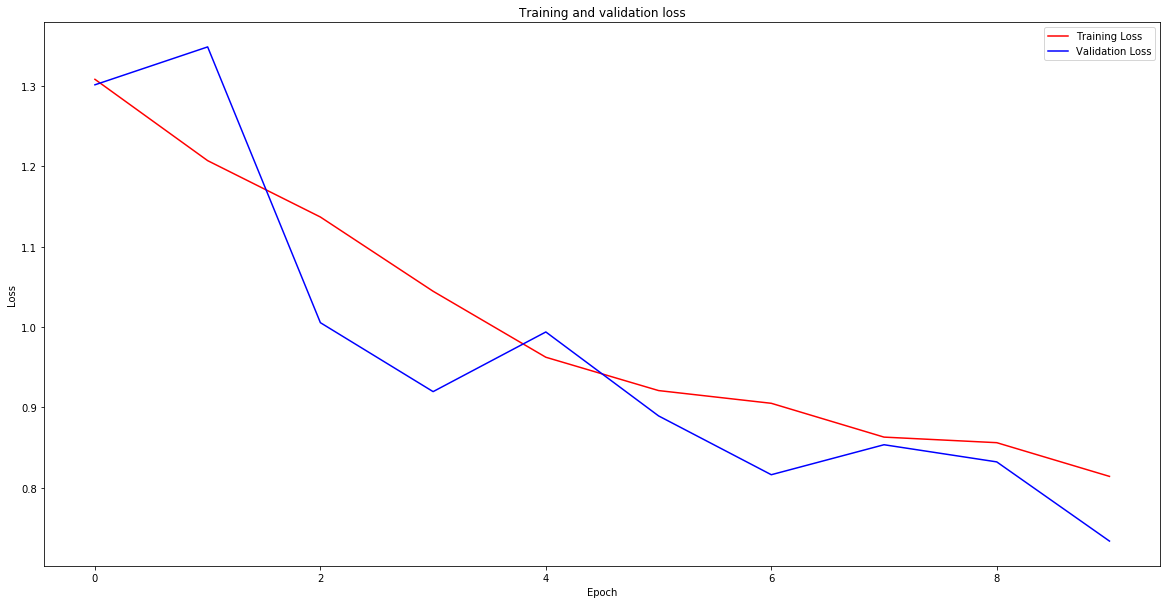

In [156]:
fig2 = plt.figure(figsize=(20,10))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [326]:
import cv2

In [337]:
img=cv2.imread('C:/Users/APPLE/Desktop/test/rain1.jpg')

In [338]:
img.shape

(256, 256, 3)

In [339]:
import numpy as np
img=np.expand_dims(img,0)

In [340]:
p=model.predict_classes(img)


In [341]:
if p==[1]:
    print('the given image is Cloudy')
if p==[2]:
    print('the given image is foggy')
if p==[3]:
    print('the given image is rain')
if p==[4]:
    print('the given image is sunny')
if p==[5]:
    print('the given image is sunrise')

the given image is rain
